In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_milan_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('milan')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/milan_{date}.csv',index=False)
get_listings_milan_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_milan = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_milan)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(milan_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17634 AirBnb listings.


In [4]:
milan_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2020-12.csv')
milan_raw_df_12_12_2020.shape


(18659, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for milan
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_milan = glob.glob('milan/**.csv')
files_milan

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['milan/Milan_2020-12.csv',
 'milan/Milan_2021-09.csv',
 'milan/Milan_2021-08.csv',
 'milan/Milan_2021-06.csv',
 'milan/Milan_2021-07.csv',
 'milan/Milan_2021-04.csv',
 'milan/Milan_2021-10.csv',
 'milan/Milan_2021-01.csv',
 'milan/Milan_2021-03.csv',
 'milan/Milan_2021-02.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

milan_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(milan_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(milan_raw_df_12_12_2020['price'].mean(),2)}.")

milan_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(milan_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_1_9_2021['price'].mean(),2)}.")

milan_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(milan_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_2_8_2021['price'].mean(),2)}.")

milan_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(milan_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_3_4_2021['price'].mean(),2)}.")

milan_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(milan_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_4_9_2021['price'].mean(),2)}.")

#milan_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(milan_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_5_19_2021['price'].mean(),2)}.")

milan_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(milan_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_6_3_2021['price'].mean(),2)}.")

milan_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(milan_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_7_4_2021['price'].mean(),2)}.")

milan_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(milan_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_8_6_2021['price'].mean(),2)}.")

milan_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(milan_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_9_7_2021['price'].mean(),2)}.")

milan_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(milan_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_10_6_2021['price'].mean(),2)}.")

#milan_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(milan_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18659 AirBnb listings; the avg price is €112.84.
The 1_9_2021 dataset contains 18572 AirBnb listings; the avg price is €112.05.
The 2_8_2021 dataset contains 18367 AirBnb listings; the avg price is €115.4.
The 3_4_2021 dataset contains 18160 AirBnb listings; the avg price is €113.68.
The 4_9_2021 dataset contains 18582 AirBnb listings; the avg price is €116.48.
The 6_3_2021 dataset contains 18029 AirBnb listings; the avg price is €116.37.
The 7_4_2021 dataset contains 18322 AirBnb listings; the avg price is €115.09.
The 8_6_2021 dataset contains 18282 AirBnb listings; the avg price is €118.93.
The 9_7_2021 dataset contains 17705 AirBnb listings; the avg price is €124.73.
The 10_6_2021 dataset contains 17231 AirBnb listings; the avg price is €126.6.


In [7]:
df_list_milan = [milan_raw_df_12_12_2020, milan_raw_df_1_9_2021, milan_raw_df_2_8_2021,
           milan_raw_df_3_4_2021, milan_raw_df_4_9_2021, milan_raw_df_6_3_2021, milan_raw_df_7_4_2021,
           milan_raw_df_8_6_2021, milan_raw_df_9_7_2021, milan_raw_df_10_6_2021]

dates_milan = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_milan = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_milan = []

def airbnb_parse_milan(df_list, files):
    for file in files_milan:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/milan/milan_{file}.csv")
        print(f"The {file} milan dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_milan(df_list, dates):
    for file in files_milan:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/milan/milan_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_milan.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_milan)

milan_parse = airbnb_parse_milan(df_list_milan, files_milan)


The 2020-12 milan dataset contains 18659 AirBnb listings -- the avg price is €112.84.
The 2021-01 milan dataset contains 18572 AirBnb listings -- the avg price is €112.05.
The 2021-02 milan dataset contains 18367 AirBnb listings -- the avg price is €115.4.
The 2021-03 milan dataset contains 18160 AirBnb listings -- the avg price is €113.68.
The 2021-04 milan dataset contains 18582 AirBnb listings -- the avg price is €116.48.
The 2021-06 milan dataset contains 18029 AirBnb listings -- the avg price is €116.37.
The 2021-07 milan dataset contains 18322 AirBnb listings -- the avg price is €115.09.
The 2021-08 milan dataset contains 18282 AirBnb listings -- the avg price is €118.93.
The 2021-09 milan dataset contains 17705 AirBnb listings -- the avg price is €124.73.
The 2021-10 milan dataset contains 17231 AirBnb listings -- the avg price is €126.6.


In [8]:
milan_summary = airbnb_to_frame_milan(df_list_milan, files_milan)
milan_summary['Date of scrape'] = pd.to_datetime(milan_summary['Date of scrape'])
milan_summary['City'] = 'Milan'

dfi.export(milan_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/airbnb_milan_summary.png")


In [9]:
master_df_milan = pd.concat(df_list_milan)
master_df_milan_unique = master_df_milan.drop_duplicates(subset='id')
master_df_milan_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44195,9.17797,Private room,100,4,12,2019-04-13,0.09,1,358,NaN,NaN
1,18429,Best Opportunity MPX-EXPO-CENTER,66856,Simone,NaN,BOVISA,45.50480,9.16199,Entire home/apt,150,2,1,2018-08-07,0.03,1,267,NaN,NaN
2,23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,NAVIGLI,45.44991,9.17597,Entire home/apt,150,1,15,2020-09-07,0.14,1,1,NaN,NaN
3,32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51988,9.22310,Entire home/apt,75,3,15,2018-07-01,0.12,4,173,NaN,NaN
4,32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51942,9.22615,Entire home/apt,71,3,29,2019-07-07,0.23,4,364,NaN,NaN


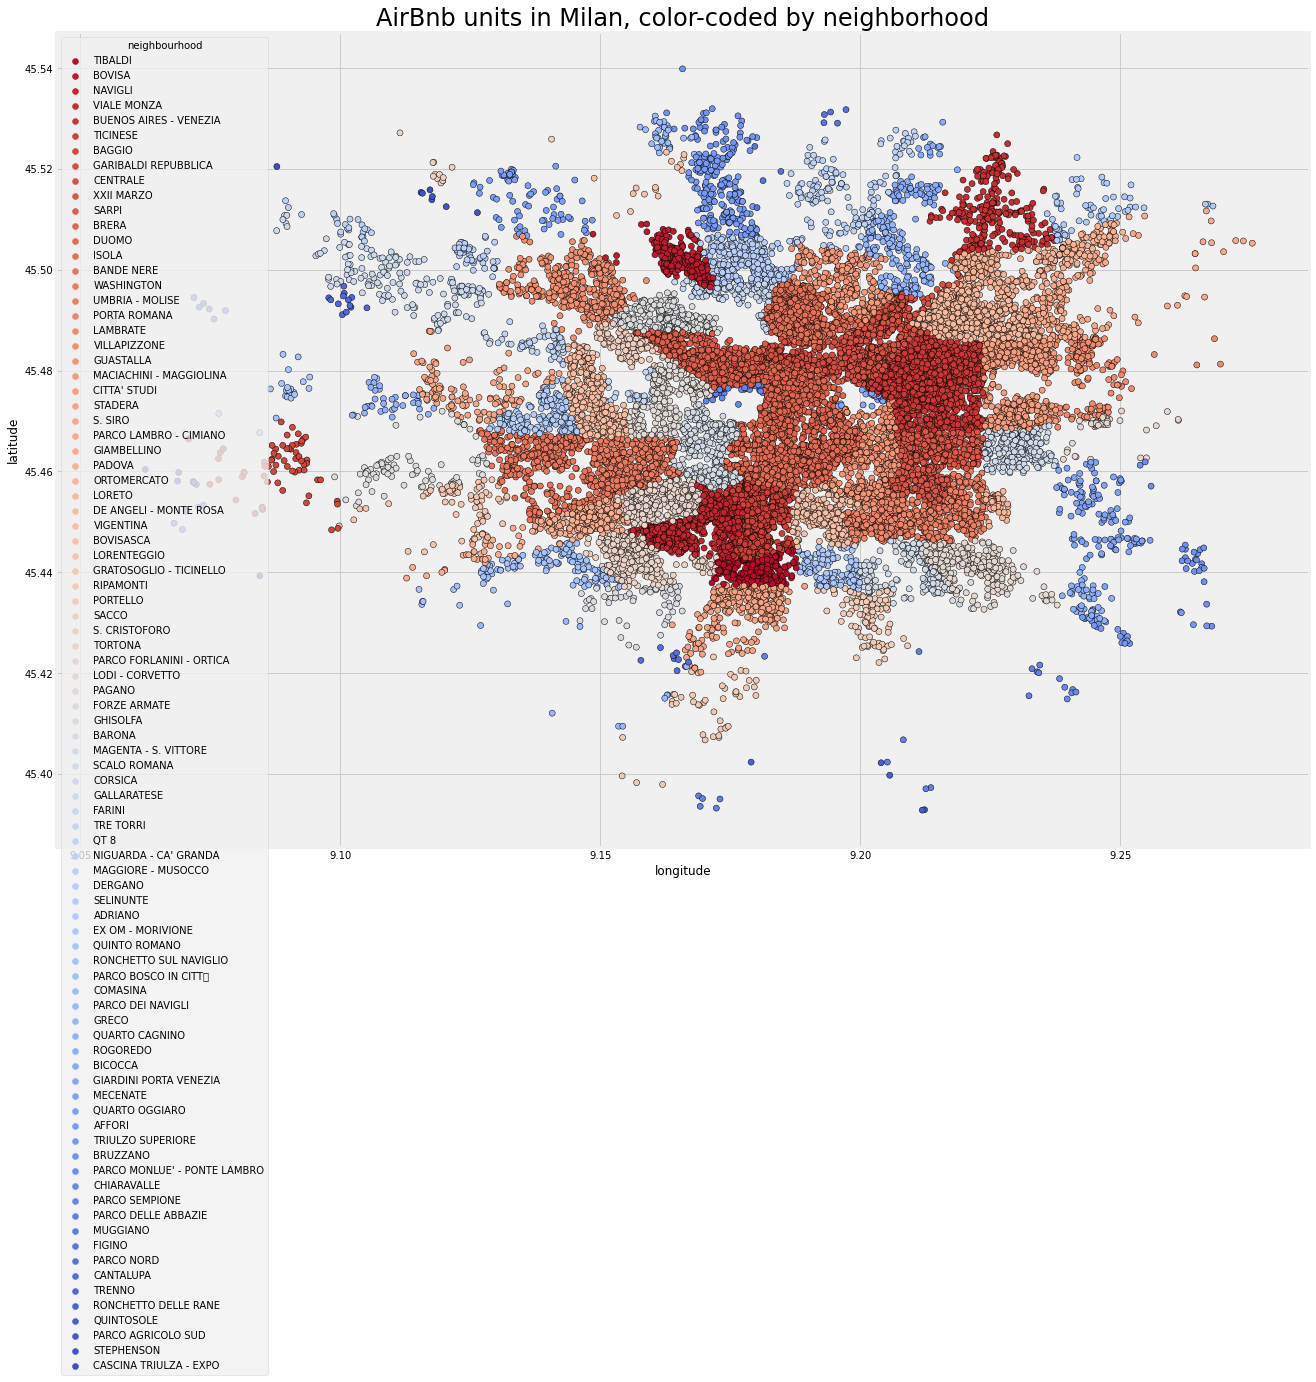

In [10]:
title = 'AirBnb units in Milan, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_milan_unique.longitude, master_df_milan_unique.latitude, hue = master_df_milan_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/airbnb_milan_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([milan_raw_df_10_6_2021,raw_df_milan],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    6128
4    3939
1    3026
3    1625
6    1412
5     751
0       3
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  120.54347233970631
Coefficients:  [ -0.17358256  -1.21114054   0.83351881   0.10564415  -7.84919425
  25.13110401 -11.05564631  -5.96734772   0.24707226]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


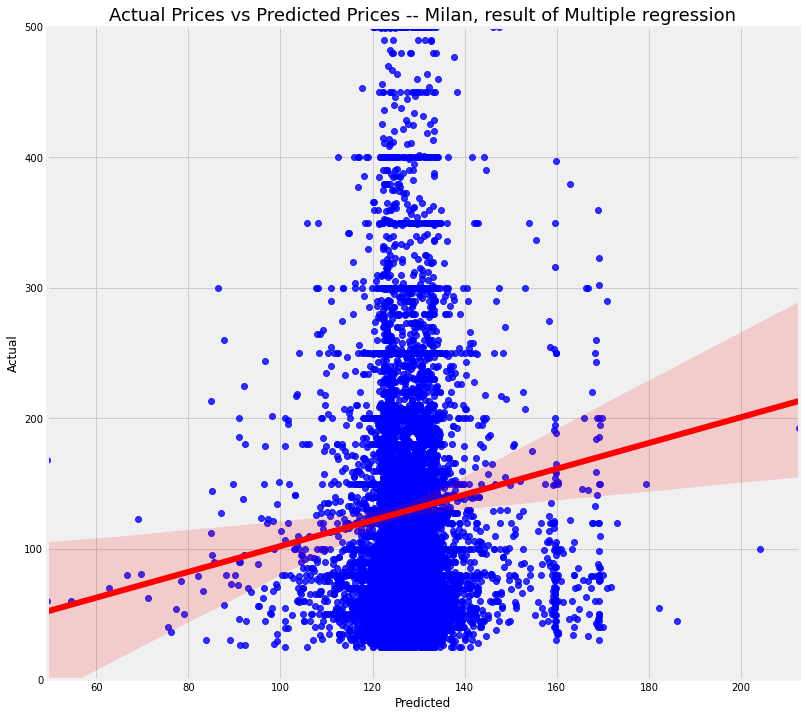

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Milan, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/airbnb_milan_multiple_regression.png')



In [18]:
df_result.shape

(14582, 3)

## The most mispriced [undervalued]

In [19]:
milan_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
milan_mispriced['%'] = (milan_mispriced['Actual']/ milan_mispriced['Predicted'] -1) *100
milan_mispriced_perc = milan_mispriced.sort_values(by=['%'], ascending=True)
milan_mispriced_perc_plot = milan_mispriced_perc.loc[(milan_mispriced_perc['Predicted']>=1) & (milan_mispriced_perc['Diff']>= 1)]
milan_mispriced_perc_plot = milan_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
milan_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
3470,25.0,141.075299,116.075299,-82.278967
9489,30.0,169.174261,139.174261,-82.266806
138,25.0,139.298130,114.298130,-82.052882
15317,25.0,138.775817,113.775817,-81.985334
14405,25.0,137.562522,112.562522,-81.826445


In [20]:

milan_mispriced_1 = raw_df_milan.loc[raw_df_milan.id==827]
milan_mispriced_2 = raw_df_milan.loc[raw_df_milan.id==748]
milan_mispriced_3 = raw_df_milan.loc[raw_df_milan.index==1308]
milan_mispriced_4 = raw_df_milan.loc[raw_df_milan.index==1748]
milan_mispriced_5 = raw_df_milan.loc[raw_df_milan.index==894]

In [22]:
id_array = [3470, 9489,138,15317,14405]

milan_mispriced_query = raw_df_milan.query('index in @id_array')
milan_mispriced_query = milan_mispriced_query.rename({'index': 'id'}, axis=1)
milan_mispriced_query.shape
#milan_mispriced_query.head(1)

(5, 74)

In [23]:
#milan_mispriced_neg = raw_df_milan.loc[raw_df_milan.index==4119]
milan_mispriced_perc_1 = raw_df_milan.loc[raw_df_milan.id==7125]
milan_mispriced_perc_2 = raw_df_milan.loc[raw_df_milan.id==3679]
milan_mispriced_perc_3 = raw_df_milan.loc[raw_df_milan.id==8267]
milan_mispriced_perc_4 = raw_df_milan.loc[raw_df_milan.id==2483]
milan_mispriced_perc_5 = raw_df_milan.loc[raw_df_milan.id==3449]

In [24]:
milan_mispriced = milan_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
milan_mispriced_1 = milan_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

milan_mispriced_1[:1]
milan_mispriced_1[:2]
milan_mispriced_1[:3]
milan_mispriced_1[:4]
milan_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
138,526162,$19.00,5.00,5.00,4.00,4.00,4.00,4.00,NaN,https://www.airbnb.com/rooms/526162
3470,16804907,$40.00,4.62,4.81,4.42,4.81,4.35,4.54,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/16804907
9489,34808705,$88.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/34808705
14405,47110671,$54.00,4.33,4.56,4.00,4.56,4.89,4.33,NaN,https://www.airbnb.com/rooms/47110671
15317,49605799,$96.00,5.00,5.00,4.50,5.00,4.50,4.50,NaN,https://www.airbnb.com/rooms/49605799


In [25]:
dfi.export(milan_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/airbnb_milan_mispriced.png")



## The best score

In [26]:
milan_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
milan_high_value.head(6)

,Actual,Predicted,Diff
10941,193.0,212.460328,19.460328
5258,100.0,204.027637,104.027637
15531,45.0,186.101892,141.101892
15907,55.0,182.217014,127.217014
17137,150.0,179.372916,29.372916
16740,120.0,173.123983,53.123983


In [27]:
id_array = [10941, 5258, 15531, 15907, 17137]

milan_best_score_query = raw_df_milan.query('index in @id_array')
milan_best_score_query = milan_best_score_query.rename({'index': 'id'}, axis=1)
#milan_best_score_query.head(1)

In [28]:
milan_best_score = milan_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
milan_best_score_1 = milan_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

milan_best_score_1[:1]
milan_best_score_1[:2]
milan_best_score_1[:3]
milan_best_score_1[:4]
milan_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
5258,21563570,$33.00,1.0,5.0,1.0,5.0,4.0,2.0,NaN,https://www.airbnb.com/rooms/21563570
10941,37544196,$225.00,1.0,5.0,1.0,5.0,3.0,1.0,NaN,https://www.airbnb.com/rooms/37544196
15531,50040312,$95.00,2.0,5.0,2.0,5.0,5.0,2.0,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/50040312
15907,50630776,$91.00,2.0,5.0,3.0,2.0,4.0,4.0,NaN,https://www.airbnb.com/rooms/50630776
17137,52622940,$115.00,3.0,5.0,2.0,5.0,5.0,2.0,"Madrid, Comunidad de Madrid, Spain",https://www.airbnb.com/rooms/52622940


In [29]:
dfi.export(milan_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/airbnb_milan_best_score.png")


